## Concatenating Images Horizontally and Vertically using OpenCV

In [3]:
#Importing opencv and matplotlib
import cv2
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

#### Let us, start with loading the images. Some sample images are present in 'images' folder.
Here we are using cv2.imread() but remember that cv2 uses BGR color format while matplot lib uses RGB color format while reading the images. So, we need to convert color of images from BGR to RGB using cvtColor while displaying.

In [4]:
img1 = cv2.imread('images/1.jpg')
img2 = cv2.imread('images/2.jpg')
img3 = cv2.imread('images/3.jpg')
img4 = cv2.imread('images/4.jpg')

In [5]:
#Function for displaying the images using pyplot of matplotlib 
def display_image(image):
    h,w,c = image.shape
    h=h/150
    w=w/150
    plt.figure(figsize=(w,h))
    plt.axis('off')
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.show()

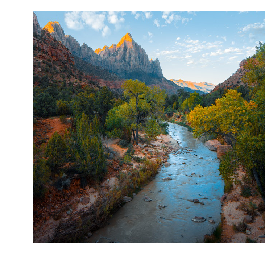

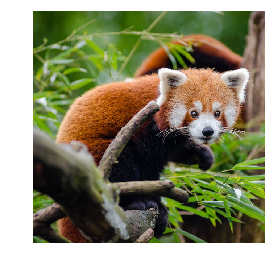

In [6]:
display_image(img1)
display_image(img2)

### 1. Simple method for images with equal size

#### a) For vertically concatenation of images cv2, has function named vconcat. We pass a list of images and it will give us vertically concatinated image.  

In [7]:
v_conc_img = cv2.vconcat([img1, img2])

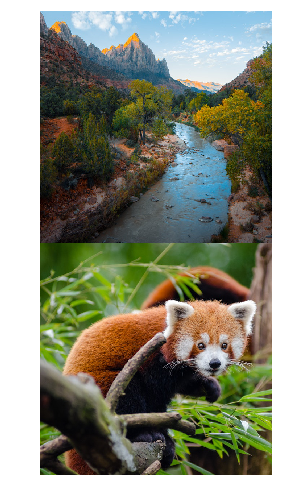

In [8]:
display_image(v_conc_img)

#### b) For horizontal concatenation of images, cv2 has a function named hconcat. Similarly, we pass a list of images and it will give us horizontally concatinated image.  

In [9]:
h_conc_img = cv2.hconcat([img1, img2])

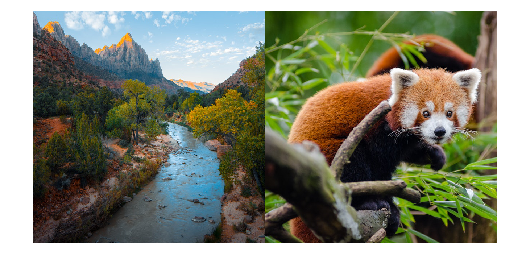

In [10]:
display_image(h_conc_img)

###  2. How to deal with images of different sizes

#### a) While merging images vertically we need same width of all images. For achiveing this, we can simply find the image with minimum width and resize all images accordingly. Then we can use vconcat to merge them.

In [12]:
# Function for vertically concatinating images of different sizes
def v_concate_images(images):
    min_width = min([img.shape[1] for img in images])
    resized_images = []
    for img in images:
        # To maintain the aspect ratio
        # We are resizing image with (min_width,height_img*min_width/width_img)
        resized_img = cv2.resize(img,(min_width,int(img.shape[0]*min_width/img.shape[1])))
        resized_images.append(resized_img)
        
    v_conc_img = cv2.vconcat(resized_images)
    return v_conc_img


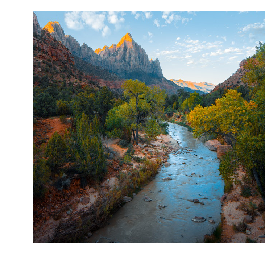

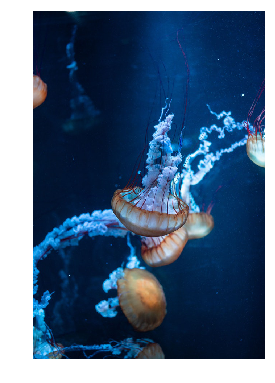

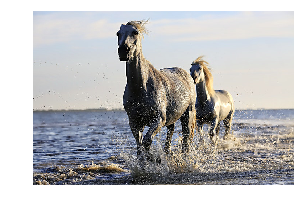

In [13]:
display_image(img1)
display_image(img3)
display_image(img4)

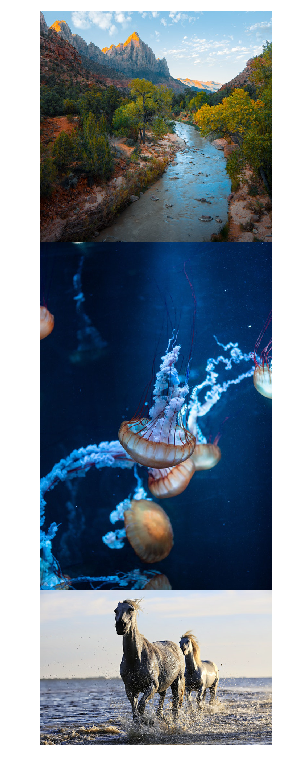

In [14]:
images = [img1,img3,img4]
v_conc_img = v_concate_images(images)
display_image(v_conc_img)

#### b) Similarly, while merging images horizontally, we need same height of all images. For achiveing this, we can simply find the image with minimum height and resize all images accordingly. Then we can use hconcat to merge them.

In [15]:
# function for horizontally concatinating images of different sizes
def h_concate_images(images):
    min_height = min([img.shape[0] for img in images])
    resized_images = []
    for img in images:
        # To maintain the aspect ratio
        # We are resizing image with (width_img*min_height/height_img,min_height)
        resized_img = cv2.resize(img,(int(img.shape[1]*min_height/img.shape[0]),min_height))
        resized_images.append(resized_img)
    h_conc_img = cv2.hconcat(resized_images)
    return h_conc_img

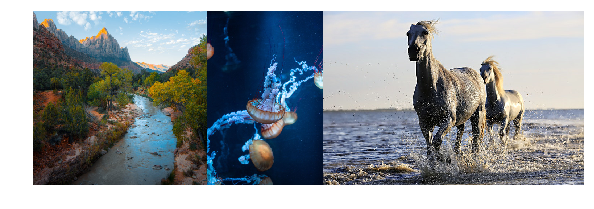

In [16]:
h_conc_img = h_concate_images(images)
display_image(h_conc_img)